# Непараметрические критерии

In [5]:
import numpy as np
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1
mpl.rcParams['figure.dpi'] = default_dpi * factor


### Двувыборочный критерий Колмогорова-Смирнова (тест на однородность).
Статистика критерия задается следуюим образом: $$D_{n,\;m}=\sup _{x}|F_{1,\;n}-F_{2,\;m}|$$.
Теорема Смирнова.
Пусть $ F_{1,\;n}(x),\;F_{2,\;m}(x)$  — эмпирические функции распределения, построенные по независимым выборкам объёмом  n и m случайной величины $\xi$. Тогда, если $ F(x)\in C^{1}(\mathbb {X} )$, то $$ \forall t>0\colon \lim _{n,\;m\to \infty }P\left({\sqrt {\frac {nm}{n+m}}}D_{n,\;m}\leqslant t\right)=K(t)=\sum _{j=-\infty }^{+\infty }(-1)^{j}e^{-2j^{2}t^{2}}$$ 
Если статистика $ {\sqrt {\frac {nm}{n+m}}}D_{n,\;m}$  превышает квантиль распределения Колмогорова $ K_{\alpha }$  для заданного уровня значимости $ \alpha $ , то нулевая гипотеза $ H_{0}$  (об однородности выборок) отвергается. Иначе гипотеза принимается на уровне $\alpha $

In [3]:
#Одновыборочный
X = np.random.randn(55)

print(st.kstest(X, 'norm'))
print('-'*40)

X = 2.0+X*4.0;

print(st.kstest(X, 'norm'))
print('-'*40)

print(st.kstest(X, 'norm', alternative = 'less'))
print('-'*40)

print(st.kstest(X, 'norm', alternative = 'greater'))
print('-'*40)

print(st.kstest(X, 'norm', args=(2.0, 4.0)))
print('-'*40)

KstestResult(statistic=0.10647231515700262, pvalue=0.5363207547818561)
----------------------------------------
KstestResult(statistic=0.5489661455887558, pvalue=4.345756136862633e-16)
----------------------------------------
KstestResult(statistic=0.5489661455887558, pvalue=2.1728780684313165e-16)
----------------------------------------
KstestResult(statistic=0.15042449319062878, pvalue=0.07484783880883378)
----------------------------------------
KstestResult(statistic=0.10647231515700262, pvalue=0.5363207547818561)
----------------------------------------


In [4]:
#Двувыборочный
Y = np.random.randn(200);
X = np.random.randn(120);

print(st.ks_2samp(X, Y))
print('-'*40)

X = 2.0*X
print(st.ks_2samp(X, Y))


Ks_2sampResult(statistic=0.22333333333333333, pvalue=0.0009447138597600269)
----------------------------------------
Ks_2sampResult(statistic=0.35333333333333333, pvalue=8.298664644357245e-09)


## Ранговые критерии
### Различия между независимыми выборками
#### Критерий Мани-Уитни (U-test)

Заданы две выборки $X_n, Y_m$

1. обе выборки независимые;
2. выборки взяты из неизвестных непрерывных распределений F(x) и G(y).

Нулевая гипотеза: $$H_0:\; \mathbb{P} \{ x<y \} = 1/2$$
Построить общий вариационный ряд объединённой выборки $x^{(1)} \leq \cdots \leq x^{(m+n)}$ и найти ранги $r(x_i),\; r(y_i)$ всех элементов обеих выборок в общем вариационном ряду.
Вычислить суммарные ранги обеих выборок и статистику Манна-Уитни  $U$:
$$R_x = \sum_{i=1}^m r(x_i);\;\;\;\; U_x = mn + \frac12m(m+1) - R_x;$$
$$R_y = \sum_{i=1}^n r(y_i);\;\;\;\; U_y = mn + \frac12n(n+1) - R_y;$$
$$U = \min\left\{U_x,U_y\right\}$.$$

Менее рациональный способ вычисления статистик Манна-Уитни $U_x,\: U_y$:
$$U_x = \sum_{i=1}^m \sum_{j=1}^n \left[ x_i < y_j\right];$$
$$U_y = \sum_{i=1}^m \sum_{j=1}^n \left[ x_i > y_j\right].$$
**Критерий (при уровне значимости $\alpha$):**

Критическая область асимптотического критерия Манна-Уитни.

против альтернативы $H_1:\; \mathbb{P} \{ x<y \} \neq 1/2$
$$U \notin \left[ U_{\alpha/2},\, U_{1-\alpha/2} \right]$$

$H_1:\; \mathbb{P} \{ x<y \} > 1/2$
$$U_x > U_{1-\alpha} $$
$H_1:\; \mathbb{P} \{ x<y \} < 1/2$
$$U_y > U_{1-\alpha}$$
где $ U_{\alpha}$  есть $\alpha$-квантиль табличного распределения Уилкоксона-Манна-Уитни с параметрами $m,\,n$.

Критические значения критерия Манна-Уитни можно найти, например, в справочнике: Кобзарь А. И. Прикладная математическая статистика. — М.: Физматлит, 2006. — 816 с. [455] 
В Python они затабулированы, для n>20 действует нормальная аппроксимация.

In [39]:
#st.mannwhitneyu T H H H H H T T T T T H
x = np.array([1, 0, 0, 0, 0, 0]);
y = np.array([1, 1, 1, 1, 1, 0]);
z = np.hstack((x, y));

m = len(x);
n = len(y);

R = st.rankdata(z, method='average')

print(z)
print(R)

R_x = 0;
R_y = 0;

for i in range(m):
    R_x = R_x+R[i]
    R_y = R_y+R[m+i]

print(R_x, R_y)


U_x = (m*n) + ((m*(m+1))/2.0) - R_x;
U_y = (m*n) + ((n*(n+1))/2.0) - R_y;
print('\nПроверка U_x+U_y = n*m\n', U_x+U_y, '=',n*m)

U = min(U_x, U_y);

print('\n', U_x, U_y, U)

print(st.mannwhitneyu(x, y))

x = np.random.randn(10)
y = np.random.randn(10)

print(st.mannwhitneyu(x, y))

[1 0 0 0 0 0 1 1 1 1 1 0]
[9.5 3.5 3.5 3.5 3.5 3.5 9.5 9.5 9.5 9.5 9.5 3.5]
27.0 51.0

Проверка U_x+U_y = n*m
 36.0 = 36

 30.0 6.0 6.0
MannwhitneyuResult(statistic=6.0, pvalue=0.017047146596295252)
MannwhitneyuResult(statistic=36.0, pvalue=0.15374472830934066)


### Критерий Краскера-Уоллиса
Проверяется нулевая гипотеза $ H_{0}\colon F_{1}(x)=\ldots =F_{k}(x)$  при альтернативе $ H_{1}\colon F_{1}(x)=F_{2}(x-\Delta _{1})=\ldots =F_{k}(x-\Delta _{k-1})$ 

In [34]:
x_1 = np.random.randn(1000)
x_2 = np.random.randn(1000)
x_3 = np.random.randn(1000)
x_4 = np.random.randn(1000)

st.kruskal(x_1, x_2, x_3, x_4)

KruskalResult(statistic=2.888749252188063, pvalue=0.4090978033459266)

## Различия между зависимыми выборками
### Критерий Уилкоксона (Критерий знаковых рангов)
Данные приходят парами

Гипотеза $H_0$: медиана разностей в парах равна 0

Альтернативная - $H_1$: медиана разностей в парах не равна 0

Пусть N — размер выборки (число пар). Обозначим $x_{1,i}$ — элементы 1 выборки и $x_{2,i}$ — элементы 2 выборки.

1. Для $i = 1, ..., N$, вычислить $|x_{2,i} - x_{1,i}|$ и $sign(x_{2,i} - x_{1,i})$

2. Исключить пары, где $|x_{2,i} - x_{1,i}| = 0.$ Пусть $N_r$ — размер полученной выборки после удаления таких пар

3. Упорядочить оставшиеся $N_r$ пар в порядке возрастания модуля разности, $|x_{2,i} - x_{1,i}|$.

4. Построить ранги всех пар, $R_i$ обозначает ранг i-й пары.

5. Вычислить статистику W $$W = |\sum_{i=1}^{N_r} [sign(x_{2,i} - x_{1,i}) \cdot R_i]|$$, модуль суммы знаковых рангов.

In [7]:
t_1 = np.random.randn(10)
t_2 = np.random.randn(10)
#t_2 = t_1

st.wilcoxon(t_1,t_2)

WilcoxonResult(statistic=25.0, pvalue=0.7988593499960496)

## Коэффициент корреляции Спирмена

Заданы две выборки $x = (x_1,\ldots,x_n),\;\; y = (y_1,\ldots,y_n).$


Коэффициент корреляции Спирмена вычисляется по формуле: $$\rho=1-\frac{6}{n(n-1)(n+1)}\sum_{i=1}^n(R_i-S_i)^2,$$где R_i - ранг наблюдения $x_i$ в ряду $x$, $S_i$ - ранг наблюдения $y_i$ в ряду $y$.
Коэффициент $\rho$ принимает значения из отрезка $[-1;\;1]$. Равенство $\rho=1$ указывает на строгую прямую линейную зависимость, $\rho=-1$ на обратную.

In [8]:
print(t_1)
R = st.rankdata(t_1, method='min')
print(R)

print('\n', '-'*40)

print(t_2)
S = st.rankdata(t_2, method='min')
print(S)

d = 0.0;
for i in range(len(t_1)):
    d = d + (R[i]-S[i])**2

n = float(len(t_1))

my_sp = 1.0 - ((6.0*d)/(n*(n-1.0)*(n+1.0)))
print(my_sp)

print(st.spearmanr(t_1, t_2))

[-2.19069187 -0.82690458  0.11799125  0.0904978   0.51305641 -0.12623631
  1.09730175 -1.09351581  1.01545109 -0.38440373]
[ 1  3  7  6  8  5 10  2  9  4]

 ----------------------------------------
[ 1.04871512  0.16299679  0.32505061  0.2250553  -0.55028039 -1.34474704
  0.05831274  0.22751181  1.28088581 -0.76987477]
[ 9  5  8  6  3  1  4  7 10  2]
-0.06666666666666665
SpearmanrResult(correlation=-0.06666666666666665, pvalue=0.8548130882487426)


**Если есть связные ранги**

## Bootstrap

Shapiro =  (0.9993586540222168, 0.9111216068267822) 



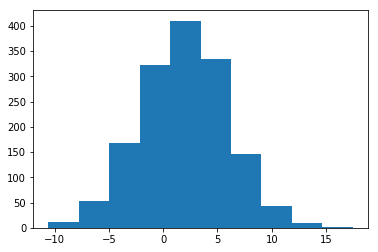

In [20]:
X = np.random.randn(1500);
X = 2.0 + 4.0*X
plt.hist(X, bins = 10);
print('Shapiro = ',st.shapiro(X), '\n');

0
5000
0.06799230861527282
Shapiro =  (0.9994366765022278, 0.13360759615898132) 

bootstrap:  1.9957891641469394 
 [1.745480973259978, 2.2597743982709346]


theoretical:  2.0129964001602865 
 [1.649132079749694, 2.376860720570879]


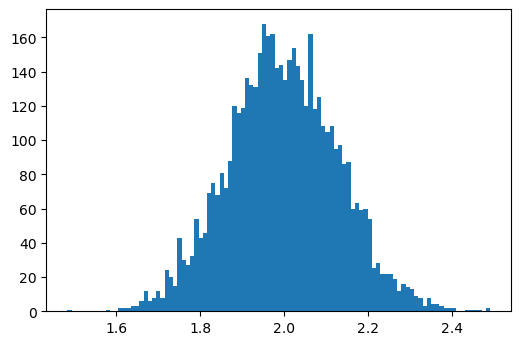

In [8]:
#print(X);
from sklearn.utils import resample

boot = []

print(len(boot))


for i in range(5000):
    imit = resample(X, replace = True);
    boot.append(np.std(imit))
    
print(len(boot))

plt.hist(boot, bins = 100);
print (st.skew(boot))
print('Shapiro = ',st.shapiro(boot), '\n');

alpha = 0.05
#boot = np.sort(boot);
print('bootstrap: ', np.percentile(boot,50), '\n', [np.percentile(boot,(alpha/2)*100.0), np.percentile(boot,100-(alpha/2)*100)])


S = np.std(X);
delta = (st.t.ppf(1.0-(alpha/2.0), len(X)-1)*S)/np.sqrt(float(len(X)))

#print('\n', np.percentile(boot,100-(alpha/2)*100)-np.percentile(boot,(alpha/2)*100.0))
#print(2*delta)

print('\n\ntheoretical: ', np.std(X), '\n', [np.std(X)-delta, delta+np.std(X)])
